# Vishal Upare

# vishalupare6899@gmail.com

# https://www.linkedin.com/in/vishal-upare-a8a092189/

# https://github.com/vish-68

# iNeuron Internship Project - UCI Credit Card (old)

# Importing libraries

In [1]:
# importing basic library:
import numpy as np
import pandas as pd 

# for visualizattion:
import matplotlib.pyplot as plt
import seaborn as sns

# for ignoring warnings:
import warnings
warnings.filterwarnings("ignore")

# for splitting data and Cross-validation:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# for preprocessing:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# for predictive modeling
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

from xgboost import XGBClassifier

# for auc:
from sklearn import metrics

# for evaluation matrix:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# for dumping model
import pickle

In [2]:
uci=pd.read_csv(r"UCI_Credit_Card.csv", index_col=0, header=0)

In [3]:
print(uci.shape)
uci.head(10)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0


In [4]:
uci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [5]:
uci.describe(include="all")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
uci.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
col=["SEX",	"EDUCATION",	"MARRIAGE", "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4",	"PAY_5",	"PAY_6"]

In [8]:
for i in col:
  print(i,":",uci[i].unique())

SEX : [2 1]
EDUCATION : [2 1 3 5 4 6 0]
MARRIAGE : [1 2 3 0]
PAY_0 : [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 : [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 : [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 : [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 : [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 : [-2  2  0 -1  3  6  4  7  8  5]


# Data Visualization

## Barplot EDUCATION vs LIMIT_BAL

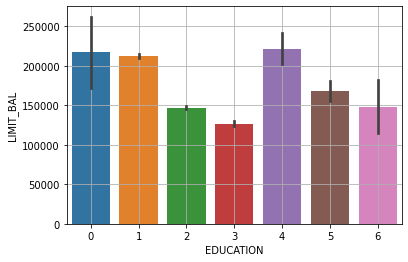

In [9]:
sns.barplot(x="EDUCATION", y="LIMIT_BAL", data=uci, estimator=np.mean)
plt.grid(True)
# plt.xticks(rotation=90)

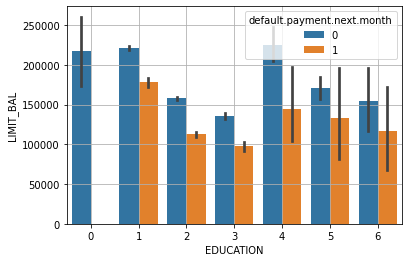

In [10]:
sns.barplot(x="EDUCATION", y="LIMIT_BAL", hue="default.payment.next.month", data=uci, estimator=np.mean)
plt.grid(True)
# plt.xticks(rotation=90)

## Countplot of default.payment.next.month i.e. target variable 

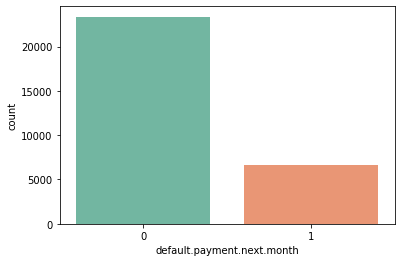

In [11]:
sns.countplot(x="default.payment.next.month",data=uci,palette="Set2")

In [12]:
uci["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

## Upsampling

In [13]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = uci[uci["default.payment.next.month"]==0]
df_minority = uci[uci["default.payment.next.month"]==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=23364, random_state=10)

# Combine majority class with upsampled minority class
uci_rev = pd.concat([df_majority, df_minority_upsampled])

1    23364
0    23364
Name: default.payment.next.month, dtype: int64


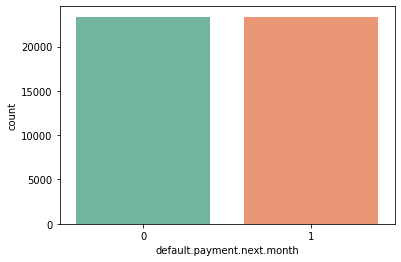

In [14]:
print(uci_rev["default.payment.next.month"].value_counts())

sns.countplot(x="default.payment.next.month",data=uci_rev,palette="Set2")

In [15]:
num=["LIMIT_BAL", "AGE"]

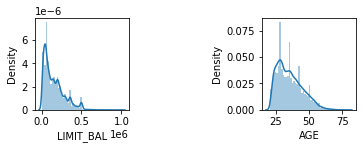

In [16]:
j=1
plt.figure(figsize=(20,20))
for i in num:
    plt.subplot(10,10,j)
    sns.distplot(uci_rev[i])
    j=j+2

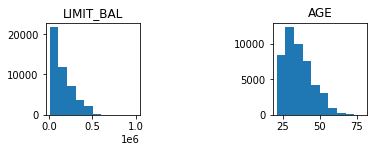

In [17]:
j=1
plt.figure(figsize=(20,20))
for i in num:
        #(printi)
        plt.subplot(10,10,j)
        plt.hist(data = uci_rev, x= i)
        plt.title(i)
        j=j+2

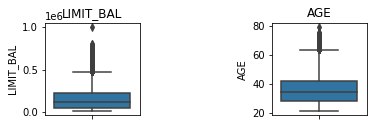

In [18]:
j=1
plt.figure(figsize=(20,20))
for i in num:
        #print(i)
        plt.subplot(10,10,j)
        sns.boxplot(y=uci_rev[i])
        plt.title(i)
        j=j+2

In [19]:
X= uci_rev.iloc[:,:-1]
Y= uci_rev["default.payment.next.month"]
print(X.shape, Y.shape)

(46728, 23) (46728,)


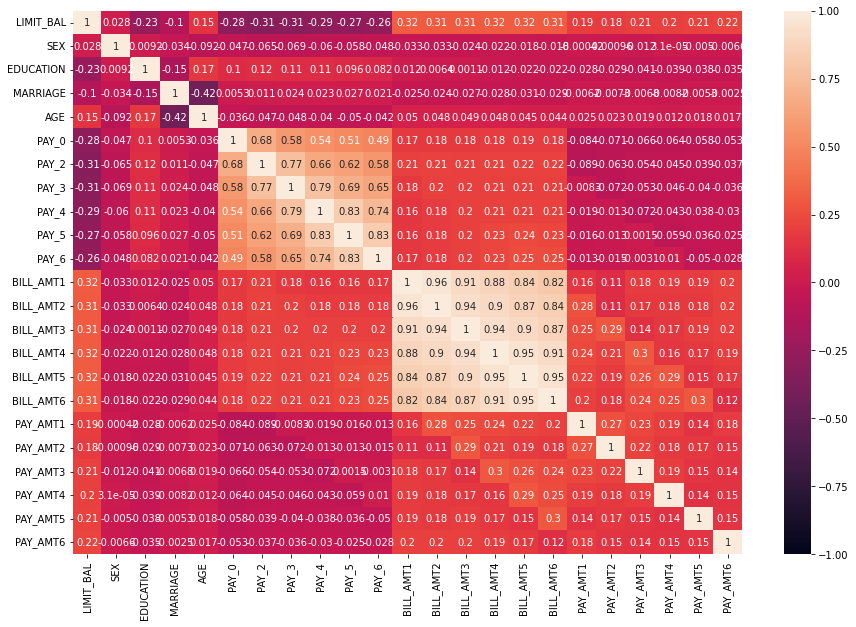

In [20]:
plt.figure(figsize=(15,10))
corr_df=X.corr(method="pearson")
sns.heatmap(corr_df,vmax=1,vmin=-1.0,annot=True);

In [21]:
uci_rev.drop(["BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6"], axis=1, inplace=True)

In [22]:
uci_rev.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,
3,90000.0,2,2,2,34,0,0,0,0,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
6,50000.0,1,1,2,37,0,0,0,0,0,0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
7,500000.0,1,1,2,29,0,0,0,0,0,0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [23]:
X= uci_rev.iloc[:,:-1]
Y= uci_rev["default.payment.next.month"]
print(X.shape, Y.shape)

(46728, 17) (46728,)


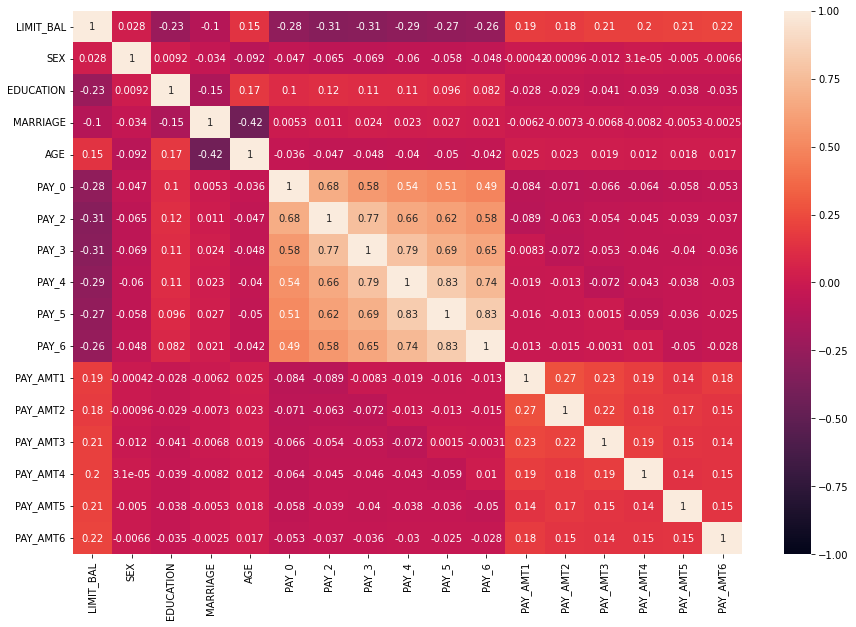

In [24]:
plt.figure(figsize=(15,10))
corr_df=X.corr(method="pearson")
sns.heatmap(corr_df,vmax=1,vmin=-1.0,annot=True);

## Splitting data

In [25]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=10)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(32709, 17) (32709,) (14019, 17) (14019,)


## Scaling data using Standard Scalar

In [26]:
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Machine Learning Models

## Logistic Regression

In [27]:
model_log= LogisticRegression()
model_log.fit(X_train, Y_train)
LR=model_log.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, LR),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, LR),"\n")
print("Classification report\n", classification_report(Y_test, LR),"\n")

Accuracy score:
 0.6695199372280477 

Confusion matix:
 [[4820 2138]
 [2495 4566]] 

Classification report
               precision    recall  f1-score   support

           0       0.66      0.69      0.68      6958
           1       0.68      0.65      0.66      7061

    accuracy                           0.67     14019
   macro avg       0.67      0.67      0.67     14019
weighted avg       0.67      0.67      0.67     14019
 



## Stochastic Gradient Descent

In [28]:
model_sgd= SGDClassifier(loss="log", random_state=10, alpha=0.01, max_iter=1000, shuffle=True, early_stopping=True, 
                        n_iter_no_change=3)
model_sgd.fit(X_train, Y_train)
SGD= model_sgd.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, SGD),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SGD),"\n")
print("Classification report\n", classification_report(Y_test, SGD),"\n")

Accuracy score:
 0.6654540266780797 

Confusion matix:
 [[4682 2276]
 [2414 4647]] 

Classification report
               precision    recall  f1-score   support

           0       0.66      0.67      0.67      6958
           1       0.67      0.66      0.66      7061

    accuracy                           0.67     14019
   macro avg       0.67      0.67      0.67     14019
weighted avg       0.67      0.67      0.67     14019
 



## K-Nearest Neighbors

In [29]:
model_KNN= KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), metric="euclidean")
model_KNN.fit(X_train, Y_train)
KNN= model_KNN.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, KNN),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, KNN),"\n")
print("Classification report\n", classification_report(Y_test, KNN),"\n")

Accuracy score:
 0.6944147228760967 

Confusion matix:
 [[5921 1037]
 [3247 3814]] 

Classification report
               precision    recall  f1-score   support

           0       0.65      0.85      0.73      6958
           1       0.79      0.54      0.64      7061

    accuracy                           0.69     14019
   macro avg       0.72      0.70      0.69     14019
weighted avg       0.72      0.69      0.69     14019
 



## Support Vector Machine

In [30]:
model_svm= SVC(kernel='rbf', C=1, gamma=0.01)
model_svm.fit(X_train, Y_train)
SVM= model_svm.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, SVM),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SVM),"\n")
print("Classification report\n", classification_report(Y_test, SVM),"\n")

Accuracy score:
 0.6991226193023754 

Confusion matix:
 [[5888 1070]
 [3148 3913]] 

Classification report
               precision    recall  f1-score   support

           0       0.65      0.85      0.74      6958
           1       0.79      0.55      0.65      7061

    accuracy                           0.70     14019
   macro avg       0.72      0.70      0.69     14019
weighted avg       0.72      0.70      0.69     14019
 



## Decision Tree

In [31]:
model_DT= DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10)
model_DT.fit(X_train, Y_train)
DT= model_DT.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, DT),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, DT),"\n")
print("Classification report\n", classification_report(Y_test, DT),"\n")

Accuracy score:
 0.8688922177045438 

Confusion matix:
 [[5493 1465]
 [ 373 6688]] 

Classification report
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      6958
           1       0.82      0.95      0.88      7061

    accuracy                           0.87     14019
   macro avg       0.88      0.87      0.87     14019
weighted avg       0.88      0.87      0.87     14019
 



## Extra Trees

In [32]:
model_EXT= ExtraTreesClassifier(n_estimators=100, random_state=10)
model_EXT.fit(X_train,Y_train)
EXT= model_EXT.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, EXT),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EXT),"\n")
print("Classification report\n", classification_report(Y_test, EXT),"\n")

Accuracy score:
 0.9319494971110636 

Confusion matix:
 [[6398  560]
 [ 394 6667]] 

Classification report
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      6958
           1       0.92      0.94      0.93      7061

    accuracy                           0.93     14019
   macro avg       0.93      0.93      0.93     14019
weighted avg       0.93      0.93      0.93     14019
 



## Tune Extra Trees

In [33]:
model_EXT= ExtraTreesClassifier(n_estimators=110, random_state=10)
model_EXT.fit(X_train,Y_train)
EXT= model_EXT.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, EXT),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EXT),"\n")
print("Classification report\n", classification_report(Y_test, EXT),"\n")

Accuracy score:
 0.9325201512233398 

Confusion matix:
 [[6403  555]
 [ 391 6670]] 

Classification report
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      6958
           1       0.92      0.94      0.93      7061

    accuracy                           0.93     14019
   macro avg       0.93      0.93      0.93     14019
weighted avg       0.93      0.93      0.93     14019
 



In [34]:
model_EXT_tune= ExtraTreesClassifier(n_estimators=112, random_state=10)
model_EXT_tune.fit(X_train,Y_train)
EXT_tune= model_EXT_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, EXT_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EXT_tune),"\n")
print("Classification report\n", classification_report(Y_test, EXT_tune),"\n")

Accuracy score:
 0.9328054782794779 

Confusion matix:
 [[6404  554]
 [ 388 6673]] 

Classification report
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      6958
           1       0.92      0.95      0.93      7061

    accuracy                           0.93     14019
   macro avg       0.93      0.93      0.93     14019
weighted avg       0.93      0.93      0.93     14019
 



## Random Forest

In [35]:
model_RF= RandomForestClassifier(n_estimators=100, random_state=10)
model_RF.fit(X_train,Y_train)
RF= model_RF.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, RF),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, RF),"\n")
print("Classification report\n", classification_report(Y_test, RF),"\n")

Accuracy score:
 0.9238176760111277 

Confusion matix:
 [[6254  704]
 [ 364 6697]] 

Classification report
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      6958
           1       0.90      0.95      0.93      7061

    accuracy                           0.92     14019
   macro avg       0.92      0.92      0.92     14019
weighted avg       0.92      0.92      0.92     14019
 



## AdaBoost

In [36]:
model_AB= AdaBoostClassifier(n_estimators=100, random_state=10)
model_AB.fit(X_train,Y_train)
AB= model_AB.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, AB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, AB),"\n")
print("Classification report\n", classification_report(Y_test, AB),"\n")

Accuracy score:
 0.706826449818104 

Confusion matix:
 [[5632 1326]
 [2784 4277]] 

Classification report
               precision    recall  f1-score   support

           0       0.67      0.81      0.73      6958
           1       0.76      0.61      0.68      7061

    accuracy                           0.71     14019
   macro avg       0.72      0.71      0.70     14019
weighted avg       0.72      0.71      0.70     14019
 



## Gradient Boost

In [37]:
model_GB= GradientBoostingClassifier(n_estimators=100, random_state=10)
model_GB.fit(X_train,Y_train)
GB= model_GB.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, GB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, GB),"\n")
print("Classification report\n", classification_report(Y_test, GB),"\n")

Accuracy score:
 0.71716955560311 

Confusion matix:
 [[5604 1354]
 [2611 4450]] 

Classification report
               precision    recall  f1-score   support

           0       0.68      0.81      0.74      6958
           1       0.77      0.63      0.69      7061

    accuracy                           0.72     14019
   macro avg       0.72      0.72      0.72     14019
weighted avg       0.72      0.72      0.72     14019
 



## XGBoost

In [38]:
model_XGB= XGBClassifier(n_estimators=100,random_state=10)
model_XGB.fit(X_train,Y_train)
XGB=model_XGB.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, XGB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, XGB),"\n")
print("Classification report\n", classification_report(Y_test, XGB),"\n")

Accuracy score:
 0.7168128967829375 

Confusion matix:
 [[5580 1378]
 [2592 4469]] 

Classification report
               precision    recall  f1-score   support

           0       0.68      0.80      0.74      6958
           1       0.76      0.63      0.69      7061

    accuracy                           0.72     14019
   macro avg       0.72      0.72      0.72     14019
weighted avg       0.72      0.72      0.71     14019
 



In [39]:
estimators = []

# model = LogisticRegression()
# estimators.append(("LOG", model))

# model0 = SGDClassifier(loss="log", random_state=10, alpha=0.01, max_iter=1000, shuffle=True, early_stopping=True, n_iter_no_change=3)
# estimators.append(("SGD", model0))

# model1 = KNeighborsClassifier(n_neighbors=11, metric="euclidean")
# estimators.append(('KNN', model1))
                  
# model2 = SVC(kernel='rbf', C=1, gamma=0.01)
# estimators.append(('SVC', model2))

# model3 = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10)
# estimators.append(('DT', model3))

model4 = ExtraTreesClassifier(n_estimators=112, random_state=10)
estimators.append(('EXT', model4))

model5 = RandomForestClassifier(n_estimators=100, random_state=10)
estimators.append(('RT', model5))

# model6 = AdaBoostClassifier(n_estimators=100, random_state=10)
# estimators.append(('AB', model6))                  
                  
# model7 = GradientBoostingClassifier(n_estimators=100, random_state=10)
# estimators.append(('GB', model7))

# model8 = XGBClassifier(n_estimators=100,random_state=10)
# estimators.append(('XG', model8))

# create the ensemble model
model_ensemble = VotingClassifier(estimators)
model_ensemble.fit(X_train,Y_train)
EM=model_ensemble.predict(X_test)

print()
print("Accuracy score:\n", accuracy_score(Y_test, EM),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EM),"\n")
print("Classification report\n", classification_report(Y_test, EM),"\n")


Accuracy score:
 0.937442042941722 

Confusion matix:
 [[6484  474]
 [ 403 6658]] 

Classification report
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      6958
           1       0.93      0.94      0.94      7061

    accuracy                           0.94     14019
   macro avg       0.94      0.94      0.94     14019
weighted avg       0.94      0.94      0.94     14019
 



In [43]:
# model = ExtraTreesClassifier(n_estimators=110, random_state=10)                 #0.9253723497483828
# model = ExtraTreesClassifier(n_estimators=112, random_state=10)                 #0.9253111456041684
# model = RandomForestClassifier(n_estimators=100, random_state=10)               #0.9199303128071601
model = VotingClassifier(estimators)                                              #0.9314256148808097

#performing kfold_cross_validation
kfold_cv=KFold(n_splits=15,random_state=10)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=model, X=X_train, y=Y_train, cv=kfold_cv)
print()
print(kfold_cv_result)

#finding the mean
print()
print(kfold_cv_result.mean())


[0.91425951 0.94635488 0.93214122 0.93489225 0.92663916 0.93168271
 0.93214122 0.93397524 0.9303072  0.93119266 0.93119266 0.93761468
 0.9293578  0.92798165 0.93165138]

0.9314256148808097


In [44]:
pickle.dump(model_ensemble,open("UCI_Ensemble_model.pkl","wb"))